Linear congruential generators (LCG)

z[i+1] = (a * z[i] + c) % m

In [48]:
def lcg(rand, a, c, m):
    rand = (a*rand + c) % m
    return rand 


def lcg2(rand, a, c, m):
    rand = (a*rand + c*rand - rand) % m
    return rand

def lcg_list(n, length, a , c, m):
    lis = []
    x = n
    for _ in range(length):
        lis.append(x)
        x = lcg(x, a, c, m)
    return lis


In [49]:
# x, y semillas iniciales
def LFG(x, y, m, l, op):
  lis = [x, y]
  for i in range(2, l):
    rand = op(lis[i-1], lis[i-2]) % m
    lis.append(rand)
  return lis

In [50]:
# lseed, lista de valores iniciales para j y k
def LFG_given_list(lseed, j, k, m, l, op):
  for n in range(len(lseed), l):
    rand = op(lseed[n-j], lseed[n-k]) % m
    lseed.append(rand)
  return lseed

In [51]:
# Crea los primeros r elementos con lcg_list. 
# Luego dependiendo de los valores de j y k se calcula el siguiente numero con Fibonacci
def LFG_main(seed, r, j, k, a, c, m, l, op):
  if(j > 0 and j < k and r >= k):
    lis = lcg_list(seed, r, a, c, m)
    lis = LFG_given_list(lis, j, k, m, l, op)
    return lis

In [52]:
seed = 65
length = 20000
a = 7**5 
c = 0 
m = 2**31 - 1 

rang = 10
add = lambda x, y: x + y
mult = lambda x, y: x * y

# Fibonacci normal con 2 semillas
# lis = LFG(1, 2, m, length, add)

# Fibonacci con j y k dinamico
j = 3
k = 7
lis = LFG_main(seed, rang, j, k, a, c, m, length, add)

print(lis)


[65, 1092455, 1181022009, 245556042, 1744312007, 1352636452, 498961622, 124339419, 271026602, 331284527, 369895461, 2015338609, 1683920979, 868857083, 2139678028, 1954947581, 1200141610, 362089842, 1822802543, 736578942, 1230946925, 1814996924, 544042876, 283604888, 29603119, 219361772, 1020183830, 1260550044, 2034358696, 1564226706, 1544154932, 2063961815, 1783588478, 416855115, 1177028212, 1670463527, 1981081821, 573699497, 1586941695, 1617186652, 990554612, 616486260, 1140166532, 824152786, 1190185757, 579624580, 293855791, 33256722, 1196110840, 1434022323, 857409508, 238812950, 2013646903, 1151265299, 272069672, 1062274096, 437803975, 1129479180, 1301087046, 303967231, 133260832, 1573156718, 1366241327, 571064807, 555152251, 519844726, 875032038, 688413083, 2093001444, 93789718, 1259477890, 500670048, 613634444, 2134509928, 1189083131, 559152241, 80815999, 301077374, 1059822289, 694450443, 288103655, 101421773, 1253602684, 368919654, 402499147, 165941326, 1063370097, 690602802, 267

Frequency of unique values of the said array:
[[        65      42084      58794 ... 2146548601 2146693916 2146841017]
 [         1          1          1 ...          1          1          1]]
Probabilidades:  [5.e-05 5.e-05 5.e-05 ... 5.e-05 5.e-05 5.e-05]


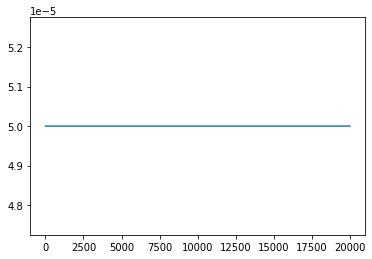

In [53]:

import matplotlib.pyplot as plt
import numpy as np

lista = np.array( lis )

unique_elements, counts_elements = np.unique(lista, return_counts=True)
print("Frequency of unique values of the said array:")
print(np.asarray((unique_elements, counts_elements)))

## normalizado = unique_elements / m
probs = counts_elements / length;
print("Probabilidades: ", probs)

plt.plot(probs)